<a href="https://colab.research.google.com/github/SankeerthShabad/IDS/blob/main/HW5/Problem2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# demonstrating how we can use Naïve Bayes to classify a response variable

In [215]:
# importing pandas and numpy

import pandas as pd
import numpy as np

# loading csv data set into Wine_flagDF

Wine_flagDF = pd.read_csv("https://raw.githubusercontent.com/SankeerthShabad/IDS/main/HW5/wine_flag_all.csv")

# printing wine_flagDF

Wine_flagDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


# Checking for missing values

In [216]:
#Checking for missing values

Wine_flagDF.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

### As we can see there null missing values

# Using describe function on wine_flagDF.

In [217]:
# using describe()

Wine_flagDF.describe()

,Type,Alcohol_flag,Sugar_flag
count,3345,3345,3345
unique,2,2,2
top,White,Low,Low
freq,2260,1684,1726


### After using describe we can see columns and count, unique, top, and freq of values in Wine_flagDF

# Encoding data of Wine_flagDF

In [218]:
# Encoding data of Wine_flagDF

from sklearn import preprocessing
Le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_Wine_lableDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, Wine_flagDF.shape[1]):
    if Wine_flagDF.dtypes[i]=='object' or Wine_flagDF.dtypes[i]=='bool':
        encoded_Wine_lableDF[Wine_flagDF.columns[i]] = Le.fit_transform(Wine_flagDF[Wine_flagDF.columns[i]])



print("-=========================")
print(Wine_flagDF)
print("-=========================")
encoded_Wine_lableDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


### Encoding of wine_flagDF is done to convert string and numeric values into binary digits to convert data set into two test and train to find the accurancy of the data frame wine_flagDF.

# contengency table for Type and Alcohol_flag

In [219]:
# contengency table for Type and Alcohol_flag

crosstab1 = pd.crosstab(Wine_flagDF.Type, Wine_flagDF.Alcohol_flag)
crosstab1

Alcohol_flag,High,Low
Type,,
Red,485,600
White,1176,1084


In [220]:
# contengency table for Type and Sugar_flag

crosstab2 = pd.crosstab(Wine_flagDF.Type, Wine_flagDF.Sugar_flag)
crosstab2

Sugar_flag,High,Low
Type,,
Red,237,848
White,1382,878


# Barplots for Alcohol flag and Sugar flag

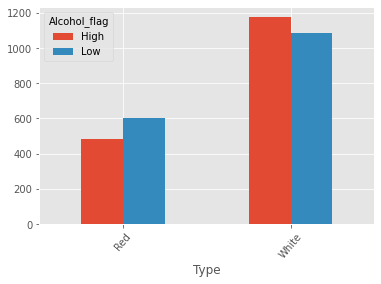

In [221]:
#barplot for crosstab of Type and Alcohol_flag

barplot = crosstab1.plot.bar(rot=50)

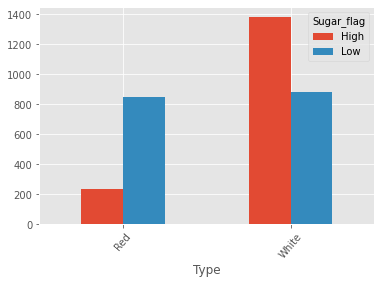

In [222]:
#barplot for crosstab of Type and Sugar_flag

barplot = crosstab2.plot.bar(rot=50)

### From above barplots alcohol flag have 2 types red and white. High white type alcohol is around 1200 and low white type alcohol is around 1100. High red type alcohol is around 600 and low red type alcohol is around 400.
### High white type sugar is around 1400 and low sugar type alcohol is around 900. High red type sugar is around 900 and low red type sugar is around 250

# The prior probability of Type, flag, and counts.

In [223]:
total = len(Wine_flagDF.index)
print('total = ',total)

p_of_red = len(Wine_flagDF[Wine_flagDF['Type']=="Red"])
print('p_of_red = ',p_of_red)

p_of_white = len(Wine_flagDF[Wine_flagDF['Type']=='White'])
print('p_of_white = ',p_of_white)

p_high_alcohol = len(Wine_flagDF[Wine_flagDF['Alcohol_flag']=='High'])
print('p_high_alcohol = ',p_high_alcohol)

p_low_alcohol = len(Wine_flagDF[Wine_flagDF['Alcohol_flag']=='Low'])
print('p_low_alcohol = ',p_low_alcohol)

p_high_sugar = len(Wine_flagDF[Wine_flagDF['Sugar_flag']=='High'])
print('p_high_sugar = ',p_high_sugar)

p_low_sugar = len(Wine_flagDF[Wine_flagDF['Sugar_flag']=='Low'])
print('p_low_sugar = ',p_low_sugar)

p_A_high_red = len(Wine_flagDF[(Wine_flagDF['Alcohol_flag']=='High') & (Wine_flagDF['Type']=='Red')])
print('p_A_high_red= ',p_A_high_red)

p_A_low_red = len(Wine_flagDF[(Wine_flagDF['Alcohol_flag']=='Low') & (Wine_flagDF['Type']=='Red')])
print('p_A_low_red= ',p_A_low_red)

p_S_high_red = len(Wine_flagDF[(Wine_flagDF['Sugar_flag']=='High') & (Wine_flagDF['Type']=='Red')])
print('p_S_high_red= ',p_S_high_red)

p_S_low_red = len(Wine_flagDF[(Wine_flagDF['Sugar_flag']=='Low') & (Wine_flagDF['Type']=='Red')])
print('p_S_low_red= ',p_S_low_red)

total =  3345
p_of_red =  1085
p_of_white =  2260
p_high_alcohol =  1661
p_low_alcohol =  1684
p_high_sugar =  1619
p_low_sugar =  1726
p_A_high_red=  485
p_A_low_red=  600
p_S_high_red=  237
p_S_low_red=  848


In [224]:
# probability for type Red and White

red=(p_of_red/total )
white=(p_of_white/total )

print("P(red)=",red)
print("P(White)=",white)

P(red)= 0.3243647234678625
P(White)= 0.6756352765321375


# The probability of high and low alcohol content. 

In [225]:
# probability for high and low Alcohol 

low_alcohol=(p_low_alcohol/total)
high_alcohol=(p_high_alcohol/total)

print("P(low_alcohol)=",low_alcohol)
print("P(high_alcohol)=",high_alcohol)

P(low_alcohol)= 0.5034379671150971
P(high_alcohol)= 0.49656203288490286


# The probability of high and low sugar content.

In [226]:
# probability for high and low Sugar

low_sugar=(p_low_sugar/total)
high_sugar=(p_high_sugar/total)

print("P(low_sugar)=",low_sugar)
print("P(high_sugar)=",high_sugar)

P(low_sugar)= 0.5159940209267564
P(high_sugar)= 0.48400597907324366


# The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).

p(Alcohol_flag = High ∣ Type = Red)

*  P(High | Red) = 485/1661
*  P(High) = 1661/3345
*  P(Red) = 1085/3345

P(High ∣Red) = P(High | Red)*P(High)/P(Red)

In [227]:
# probability for Alcohol high Type Red

A_high_red=((p_A_high_red/p_high_alcohol )*(p_high_alcohol /total))/(p_of_red /total)
print("p(high_alcohol_red)=",A_high_red)

p(high_alcohol_red)= 0.44700460829493094


p(Alcohol_flag = Low ∣ Type = Red)

*  P(Low | Red) = 600/1684
*  P(Low) = 1684/3345
*  P(Red) = 1085/3345

P(Low ∣Red) = P(Low | Red)*P(Low)/P(Red)

In [228]:
# probability for Alcohol low Type Red

A_low_red=((p_A_low_red/p_low_alcohol )*(p_low_alcohol /total))/(p_of_red/total)
print("p(low_alcohol_red)=",A_low_red)

p(low_alcohol_red)= 0.5529953917050691


# The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

p(Sugar_flag = High ∣ Type = Red)

*  P(High | Red) = 237/1619
*  P(High) = 1619/3345
*  P(Red) = 1085/3345

P(High ∣Red) = P(High | Red)*P(High)/P(Red)

In [229]:
# probability for Sugar high Type Red

S_high_red=((p_S_high_red/p_high_sugar )*(p_high_sugar /total))/(p_of_red /total)
print("p(high_Sugar_red)=",S_high_red)

p(high_Sugar_red)= 0.21843317972350232


p(Sugar_flag = Low ∣ Type = Red)

*  P(Low | Red) = 848/1726
*  P(Low) = 1726/3345
*  P(Red) = 1085/3345

P(Low ∣Red) = P(Low | Red)*P(Low)/P(Red)

In [230]:
# probability for Sugar low Type Red

S_low_red=((p_S_low_red/p_low_sugar)*(p_low_sugar/total))/(p_of_red/total)
print("p(low_Sugar_red)=",S_low_red)

p(low_Sugar_red)= 0.7815668202764977


# NB classifiers and their accuracy on various training/test ratios

In [240]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# NB classifier and accuracy on various train and test

X = encoded_Wine_lableDF.drop(columns='Type')
y = encoded_Wine_lableDF['Type']

accuracy = []
ratio = []

for i in [.20, .25, .30,.40,.50]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, shuffle=True)
    nb = BernoulliNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    ratio.append(f'{round((1-i)*100)}:{round(i*100)}')
    print(f'Ratio {round((1-i)*100)}:{round(i*100)}',"\n",f'model accuracy : {round(accuracy_score(y_test, y_pred),4)}')

Ratio 80:20 
 model accuracy : 0.71
Ratio 75:25 
 model accuracy : 0.7235
Ratio 70:30 
 model accuracy : 0.7638
Ratio 60:40 
 model accuracy : 0.7294
Ratio 50:50 
 model accuracy : 0.725


### After NB clasifiers and calculating accuracy and ratios we can see that 70:30 have the higher accuracy rate and 80:20 have lower accuracy rate

# Ploting the model accuracy measures

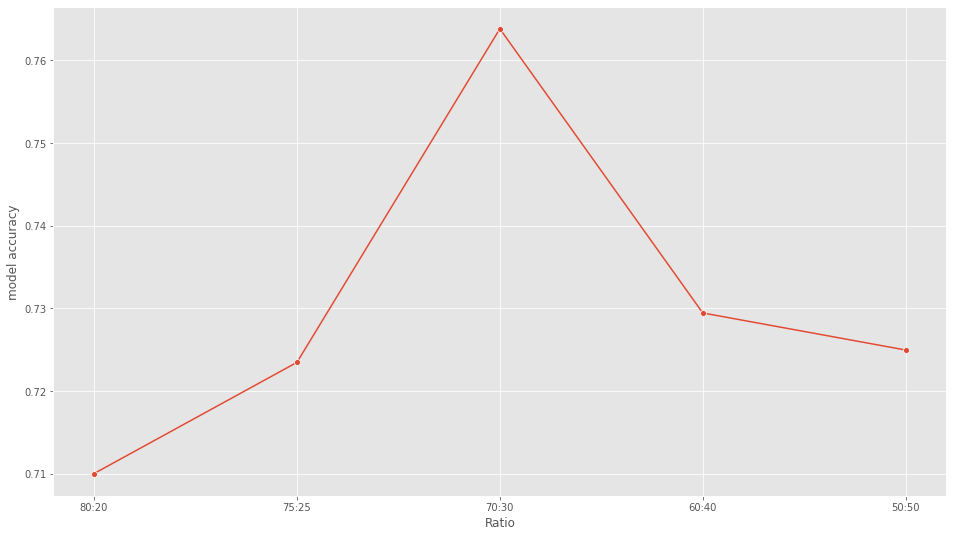

In [241]:
# Ploting model accuracy model

plt.figure(figsize=(16,9))
plt.style.use('ggplot')
sns.lineplot(x=ratio, y=accuracy, marker='o',);
plt.xlabel('Ratio');
plt.ylabel('model accuracy');
plt.show()

### From the above ploting we can observe the Ratio of test and train and model accuracy. 70:30 have higher model accuracy and 80:20 have lowest model accuracy.

# Summary

> Wine flagDF is encoded to convert text and numeric values into binary digits in order to divide the data set into two test and train groups in order to determine the data frame's accuracy.
> Applied the relevant formulae to each probability supplied.
> We can observe that 70:30 has a greater accuracy rate and 80:20 has a lower accuracy rate after building NB clasifiers and calculating accuracy and ratios.
> We can see the Ratio of test and train and model correctness from the model accuracy plotting. Model accuracy is greatest in the 70:30 range and lowest in the 80:20 range.







